# Esonero 2 - 17 Maggio 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice descrivendo le operazioni effettuate


# Esercizio 1

Data la seguente immagine, costruire la feature pyramid di gaussiane e descrivere il procedimento

![](figure1.jpg)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.color import rgb2gray, gray2rgb
import matplotlib.pyplot as mp_image
import imageio
from scipy import ndimage
%matplotlib inline
from matplotlib import cm

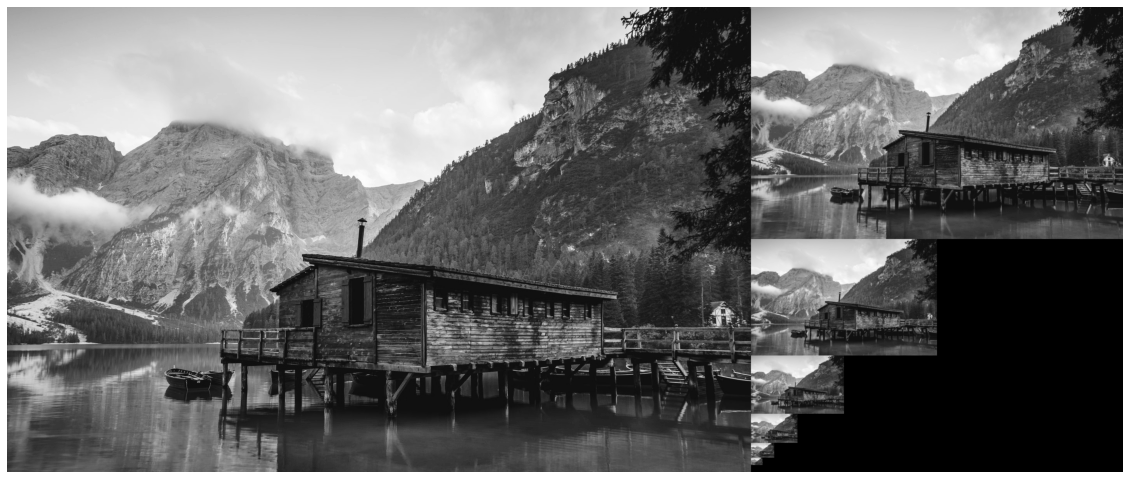

In [2]:
imageFull=mp_image.imread(os.path.join('figure1.jpg'))
image = rgb2gray(imageFull)
maxv, minv = np.max(image), np.min(image)
image = (image - minv)/(maxv-minv)
rows,cols = image.shape
output = np.zeros((rows,cols+cols//2))

output[:rows,:cols] = image
num_octave = 6
cur_scale = image
horiz = True
rows = 0

for i in range(num_octave):
    sigma = 2**i
#     sigma=1
    cur_scale = ndimage.gaussian_filter(image,sigma)
    cur_scale = cur_scale[::2**(i+1),::2**(i+1)]
#     cur_scale = cur_scale[::2,::2]
    rows_scaled, cols_scaled = cur_scale.shape
    output[rows:rows+rows_scaled,cols:cols+cols_scaled] = cur_scale
    rows += rows_scaled        
        
plt.figure(figsize=(20, 20))
plt.imshow(output,cmap=cm.gray)
plt.axis('off')
plt.show()

# Esercizio 2


Data la seguente sequenza di tensori e la funzione *f*, calcolare il gradiente per i tensori a,b,c,d,e,y. 

Descrivere come viene costruito il grafo di computazione mostrando quali operazioni vengono effettuate, cioè calcolando le derivate parziali in maniera esplicita. 

$
y = f(a,b,c,d,e) = \sum \frac {a^2 + \exp(b^4) * \sin (c*d)} {3e}
$

*non sono necessarie librerie esterne*

In [3]:
import torch
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
a = torch.tensor([5, 6, 7, 8, 1, 2], dtype=torch.float, requires_grad=True).view(3, 2)
b = torch.tensor([3, 3, 0, 1, 6, 2], dtype=torch.float, requires_grad=True).view(3, 2)
c = torch.tensor([1, 5, 0, 7, 4, 3], dtype=torch.float, requires_grad=True).view(3, 2)
d = torch.tensor([2, 6, 3, 8, 3, 1], dtype=torch.float, requires_grad=True).view(3, 2)
e = torch.tensor([5, 2, 1, 1, 1, 1], dtype=torch.float, requires_grad=True).view(3, 2)

a.retain_grad()
b.retain_grad()
c.retain_grad()
d.retain_grad()
e.retain_grad()

print(a.shape,b.shape,c.shape,d.shape,e.shape)

torch.Size([3, 2]) torch.Size([3, 2]) torch.Size([3, 2]) torch.Size([3, 2]) torch.Size([3, 2])


In [5]:
aa= torch.pow(a, 2)
bb=torch.exp(torch.pow(b, 2))
cd=torch.sin(torch.mm(c,torch.transpose(d, 1, 0)))
den= 3*e

aa.retain_grad()
bb.retain_grad()
cd.retain_grad()
den.retain_grad()



In [6]:
print(aa.shape,bb.shape,cd.shape,den.shape)

torch.Size([3, 2]) torch.Size([3, 2]) torch.Size([3, 3]) torch.Size([3, 2])


In [7]:
bcd=torch.mm(torch.transpose(bb, 1, 0),cd)
print(bcd)

tensor([[ 3.2876e+15, -4.2758e+15,  2.8035e+15],
        [ 4.5074e+03, -6.7955e+03,  8.0541e+03]], grad_fn=<MmBackward>)


In [8]:
function=torch.sum(torch.transpose(aa,0,1)+bcd)/den

o = torch.sum(function)
o.retain_grad()

o.backward()

print('GRAD:')
print(f'grad a: {a.grad}')
print(f'grad b: {b.grad}')
print(f'grad c: {c.grad}')
print(f'grad c: {d.grad}')
print(f'grad e: {e.grad}')
print(f'grad o: {o.grad}')

GRAD:
grad a: tensor([[15.6667, 18.8000],
        [21.9333, 25.0667],
        [ 3.1333,  6.2667]])
grad b: tensor([[ 5.4005e+04,  5.4005e+04],
        [-0.0000e+00, -6.6527e+00],
        [ 3.4128e+16,  1.4407e+02]])
grad c: tensor([[ 7.3561e+04,  2.3614e+05],
        [ 2.3426e+01,  3.0174e+01],
        [-9.2474e+15,  1.4171e+16]])
grad c: tensor([[ 1.7478e+16,  1.3108e+16],
        [-3.4572e+15, -2.5929e+15],
        [-2.0525e+16, -1.5393e+16]])
grad e: tensor([[-2.4204e+13, -1.5128e+14],
        [-6.0511e+14, -6.0511e+14],
        [-6.0511e+14, -6.0511e+14]])
grad o: 1.0


# Esercizio 3

Dati due batch A e B, mostrare gli effetti della BN.

Suggerimento: calcolare gli istogrammi di A e B

# Classificazione di MNIST

In [42]:
import torchvision
import torchvision.transforms as transforms


batch_size = 64

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
image, label = train_dataset[0]

print(image.shape)

torch.Size([1, 28, 28])


In [43]:
class SimpleFullyConnectedNet(nn.Module):
    def __init__(self,input_size, hidden_size, num_classes):
        super(SimpleFullyConnectedNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)          
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [44]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 28*28
hidden_size = 300
num_classes = 10
batch_sizeA = 100
batch_sizeB = 100

full_model = SimpleFullyConnectedNet(input_size, hidden_size, num_classes).to(device)

#### TRAIN

In [45]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0005
optimizer = torch.optim.Adam(full_model.parameters(), lr=learning_rate)  

num_epochs = 3

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(num_epochs + 1)]

In [46]:
# The number of steps for each epoch, defined by the number of instances divided by the batch size. 
total_step = len(train_loader)

def train(epoch,model,criterion,optimizer,batch_size,reshape=True):
    for batch_idx, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        if reshape:
            images = images.reshape(-1, 28*28)
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (batch_idx+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, num_epochs, batch_idx+1, total_step, loss.item()))
        
        train_losses.append(loss.item())
        train_counter.append(
        (batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))
        
def test(model,criterion,reshape=True):
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            if reshape:
                images = images.reshape(-1, 28*28)
                
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            correct += (predicted == labels).sum().item()
            
            loss = criterion(outputs,labels,)
            
            test_loss += loss.item()
            
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

# batchA + risultati

In [47]:
test(full_model,criterion)
for epoch in range(1,num_epochs+1):
    train(epoch,full_model,criterion,optimizer,batch_sizeA)
    test(full_model,criterion)


Test set: Avg. loss: 0.0360, Accuracy: 1770/10000 (18%)

Epoch [1/3], Step [100/938], Loss: 0.4379
Epoch [1/3], Step [200/938], Loss: 0.4005
Epoch [1/3], Step [300/938], Loss: 0.2965
Epoch [1/3], Step [400/938], Loss: 0.1777
Epoch [1/3], Step [500/938], Loss: 0.3611
Epoch [1/3], Step [600/938], Loss: 0.3065
Epoch [1/3], Step [700/938], Loss: 0.3189
Epoch [1/3], Step [800/938], Loss: 0.2336
Epoch [1/3], Step [900/938], Loss: 0.2455

Test set: Avg. loss: 0.0031, Accuracy: 9430/10000 (94%)

Epoch [2/3], Step [100/938], Loss: 0.2029
Epoch [2/3], Step [200/938], Loss: 0.1204
Epoch [2/3], Step [300/938], Loss: 0.0652
Epoch [2/3], Step [400/938], Loss: 0.1380
Epoch [2/3], Step [500/938], Loss: 0.1928
Epoch [2/3], Step [600/938], Loss: 0.1936
Epoch [2/3], Step [700/938], Loss: 0.1914
Epoch [2/3], Step [800/938], Loss: 0.1908
Epoch [2/3], Step [900/938], Loss: 0.0521

Test set: Avg. loss: 0.0020, Accuracy: 9613/10000 (96%)

Epoch [3/3], Step [100/938], Loss: 0.1286
Epoch [3/3], Step [200/938],

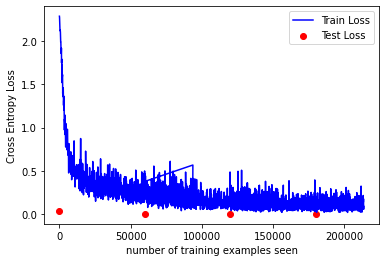

In [48]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('Cross Entropy Loss')
plt.show()


# batchB + risultati

In [53]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 28*28
hidden_size = 300
num_classes = 10
batch_sizeA = 100
batch_sizeB = 100

full_model = SimpleFullyConnectedNet(input_size, hidden_size, num_classes).to(device)

#### TRAIN

In [54]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0005
optimizer = torch.optim.Adam(full_model.parameters(), lr=learning_rate)  

num_epochs = 3

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(num_epochs + 1)]

In [55]:
test(full_model,criterion)
for epoch in range(1,num_epochs+1):
    train(epoch,full_model,criterion,optimizer,batch_sizeB)
    test(full_model,criterion)


Test set: Avg. loss: 0.0362, Accuracy: 907/10000 (9%)

Epoch [1/3], Step [100/938], Loss: 0.4352
Epoch [1/3], Step [200/938], Loss: 0.3664
Epoch [1/3], Step [300/938], Loss: 0.3783
Epoch [1/3], Step [400/938], Loss: 0.1887
Epoch [1/3], Step [500/938], Loss: 0.3594
Epoch [1/3], Step [600/938], Loss: 0.1795
Epoch [1/3], Step [700/938], Loss: 0.1812
Epoch [1/3], Step [800/938], Loss: 0.1876
Epoch [1/3], Step [900/938], Loss: 0.2217

Test set: Avg. loss: 0.0030, Accuracy: 9448/10000 (94%)

Epoch [2/3], Step [100/938], Loss: 0.1283
Epoch [2/3], Step [200/938], Loss: 0.2556
Epoch [2/3], Step [300/938], Loss: 0.1193
Epoch [2/3], Step [400/938], Loss: 0.2230
Epoch [2/3], Step [500/938], Loss: 0.1571
Epoch [2/3], Step [600/938], Loss: 0.2111
Epoch [2/3], Step [700/938], Loss: 0.1916
Epoch [2/3], Step [800/938], Loss: 0.2553
Epoch [2/3], Step [900/938], Loss: 0.1085

Test set: Avg. loss: 0.0022, Accuracy: 9582/10000 (96%)

Epoch [3/3], Step [100/938], Loss: 0.0851
Epoch [3/3], Step [200/938], L

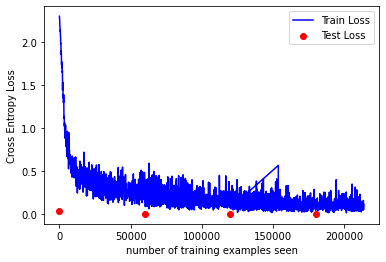

In [56]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('Cross Entropy Loss')
plt.show()


# Esercizio 4

Dato il seguente frammento di codice

In [ ]:
conv1 = torch.nn.Conv2d(3, 10, kernel_size=3, padding=1, stride=2)
conv2 = torch.nn.Conv2d(10, 30, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))

model = lambda x: conv2(conv1(x))

Indicare giustificando la risposta qual'è il risultato per un'immagine 1x3x400x400 illustrandolo con un esempio. 

# Esercizio 5

Adattare/semplificare la rete VGG affinché gestisca un input di immagini 400x400

In [27]:
import torch
import torch.nn as nn
from torch.nn import functional as F

In [61]:
class VGG(nn.Module):
    
    def __init__(self, features, num_classes=1000, init_weights=True):
        super(VGG, self).__init__()
        self.features = features
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x
    
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(
                    m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)


def make_layers(cfg, batch_norm=False):
    layers = []
    in_channels = 3
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
    return nn.Sequential(*layers)

cfg = {
    'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'D': [8, 8, 'M', 16, 16, 'M', 32,32, 32, 'M', 32, 32, 32, 'M', 32, 32, 32, 'M'],
    'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def test(net,img_size=400):
    x = torch.randn(1,3,img_size,img_size)
    (print(x.shape))
    y = net(x)
    print("Input: {}; Output: {}; N. of params: {:,}".format(list(x.size()), list(y.size()), count_parameters(net)))

In [62]:
vgg16 = VGG(make_layers(cfg['D']))

test(vgg16,400)

torch.Size([1, 3, 400, 400])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x4608 and 25088x4096)

# Esercizio 6

Data la seguente immagine, calcolare la IoU tra i due box mostrati in figura. 
Descrivere tutte le operazioni effettuate

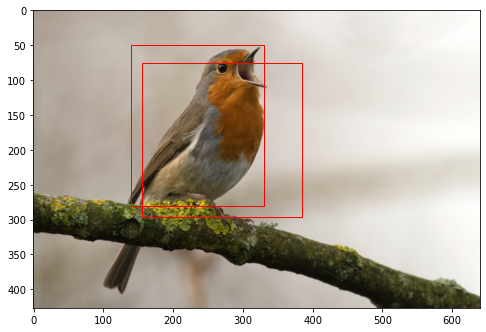

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
import matplotlib.patches as patches

def plot_bbox(image_np, bbox_list):
    fig, ax = plt.subplots(1)
    fig.set_size_inches(8, 8)

    ax.imshow(image_np)

    for bbox_idx in range(bbox_list.shape[0]):
        x1, y1, x2, y2 = bbox_list[bbox_idx, :].tolist()

        w = x2 - x1
        h = y2 - y1

        rect = patches.Rectangle((x1, y1), w, h,
                                 linewidth=1, 
                                 edgecolor='r', 
                                 facecolor='none')

        ax.add_patch(rect)

    plt.show();

imageBB1 = mp_image.imread('figure2.jpg')

bb1 = [140, 50, 330, 280]
bb2 = [156, 75, 384, 297]

plot_bbox(imageBB1, np.array([bb1, bb2]))

In [10]:
def bb_intersection_over_union(boxA, boxB):
	# determina la (x, y)-coordinata del intersection rectangle
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])
	# calcola l' del intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	# calcola l' area sia della previsione che del ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
	boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
	# calcola l'intersezione sull'unione prendendo l'intersezione
	# area e dividendola per la somma di predizione + verità fondamentale
	# aree - l'area di intersezione
	iou = interArea / float(boxAArea + boxBArea - interArea)
	# return the intersection over union value
	return iou
iou=bb_intersection_over_union(bb1,bb2)

In [11]:
iou

0.6095911258412526